# Breast Cancer Project

# Importing Libraries

In [1]:
# for database
import sqlite3
import pandas as pd # for dataframe
import numpy as np # analysis
# plotting 
import matplotlib
import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde
from pandas.plotting import parallel_coordinates
from sklearn import preprocessing 
from sklearn.decomposition import PCA
from sklearn import manifold 
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import seaborn as sns

from scipy import stats # significance levels, normality
import itertools # for combinations
import statsmodels.api as sm # anova
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore') # hide matplotlib warnings


# Connecting to the Data

In [2]:
df= pd.read_csv('Breast_Cancer_data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Cleaning the Data 

In [4]:
# Screen for missing values:

df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
# Screening for categorical Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
# Standardizing the data
df.columns = df.columns.str.replace(' ', '_')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [8]:
df.shape

(569, 32)

In [9]:
# Checking for Duplicates
df.duplicated().sum()

0

# Check for extraneous values

In [10]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 883263     0.001757
906564     0.001757
89122      0.001757
9013579    0.001757
868682     0.001757
Name: id, dtype: float64 


diagnosis 
 B    0.627417
M    0.372583
Name: diagnosis, dtype: float64 


radius_mean 
 12.34    0.007030
12.77    0.005272
15.46    0.005272
12.89    0.005272
13.05    0.005272
Name: radius_mean, dtype: float64 


texture_mean 
 14.93    0.005272
15.70    0.005272
18.90    0.005272
16.84    0.005272
17.46    0.005272
Name: texture_mean, dtype: float64 


perimeter_mean 
 82.61     0.005272
134.70    0.005272
87.76     0.005272
130.00    0.003515
58.79     0.003515
Name: perimeter_mean, dtype: float64 


area_mean 
 512.2     0.005272
1214.0    0.003515
399.8     0.003515
758.6     0.003515
1075.0    0.003515
Name: area_mean, dtype: float64 


smoothness_mean 
 0.1007    0.008787
0.1075    0.007030
0.1054    0.007030
0.1150    0.007030
0.1089    0.005272
Name: smoothness_mean, dtype: float64 


compactness_mean 
 0.12060    0.005272
0.11470    0.005272
0

# Histograms to check the normalization of the Data

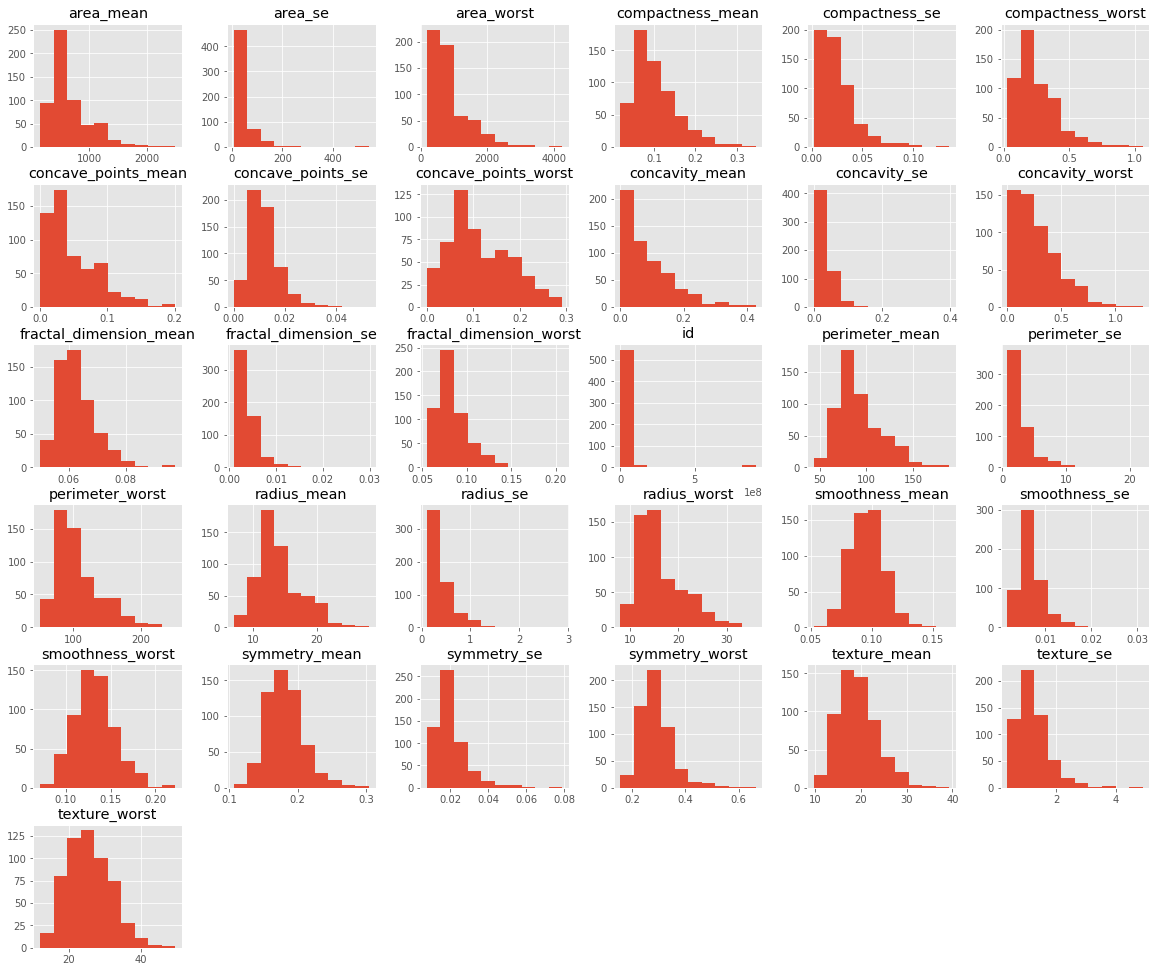

In [11]:
hist= df.hist(figsize = (20,17))

# Transformation for Standarzation of the Data

In [12]:
df1 = pd.DataFrame()
non_normal = ['area_mean', 'area_worst', 'compactness_mean', 'compactness_worst', 'concave_points_mean', 'concave_points_worst', 'concavity_mean', 'concavity_worst', 'fractal_dimension_mean', 'fractal_dimension_worst', 'perimeter_mean', 'perimeter_worst', 'radius_mean', 'radius_worst','symmetry_worst']
for feat in non_normal:
    df1[feat] = df[feat].map(lambda x: np.cbrt(x))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018ED8ECE108>,
      dtype=object)

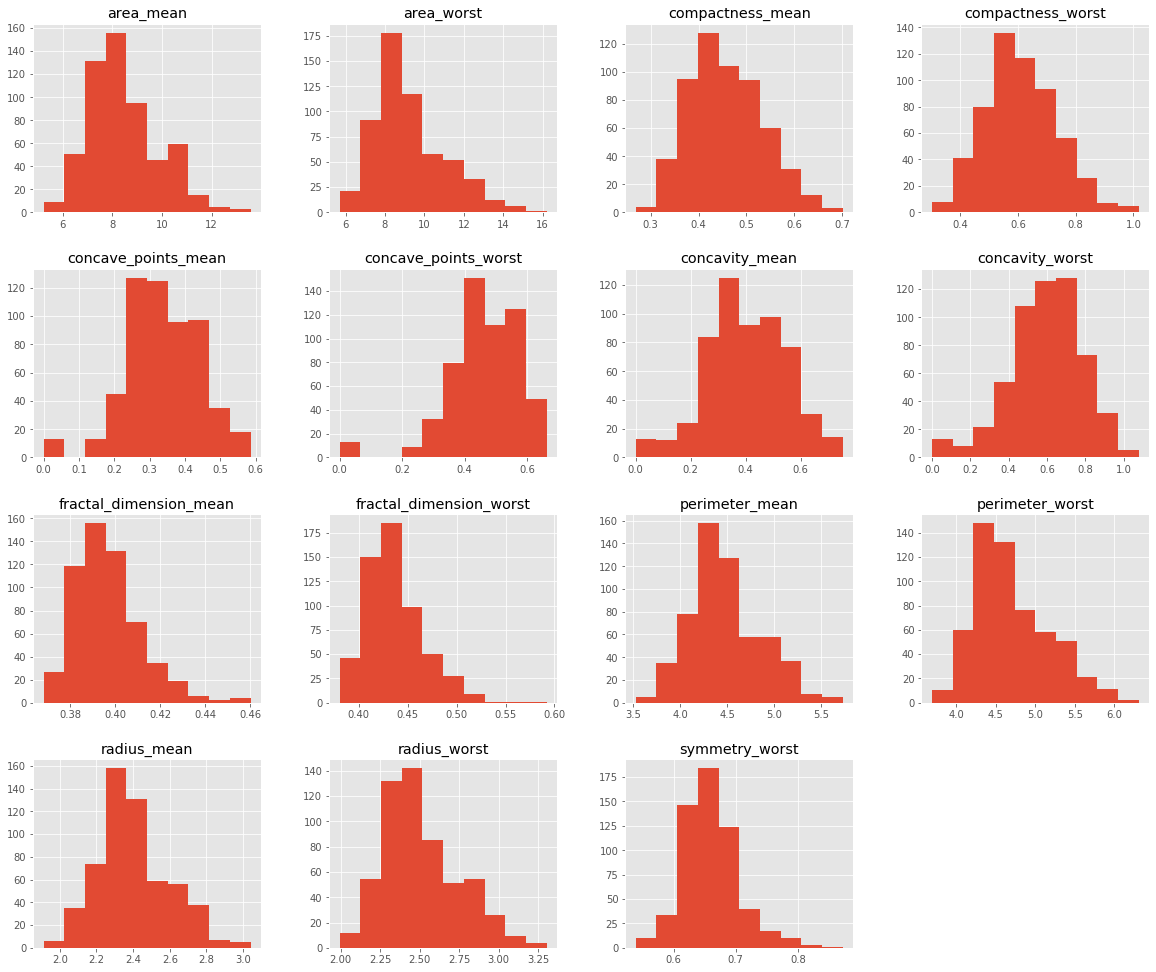

In [13]:
#creating a normalized histogram
normalised_hist = df1.hist(figsize=(20,17))
normalised_hist

In [14]:
df2 = df.join(df1, rsuffix='CBRT_')

In [15]:
df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,concave_points_worstCBRT_,concavity_meanCBRT_,concavity_worstCBRT_,fractal_dimension_meanCBRT_,fractal_dimension_worstCBRT_,perimeter_meanCBRT_,perimeter_worstCBRT_,radius_meanCBRT_,radius_worstCBRT_,symmetry_worstCBRT_
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,0.642639,0.669507,0.892907,0.428558,0.491731,4.970493,5.693910,2.620256,2.938758,0.772000
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,0.570827,0.442935,0.622824,0.384106,0.446508,5.103189,5.415229,2.739963,2.923628,0.650296
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,0.624025,0.582258,0.766536,0.391465,0.444087,5.065797,5.342649,2.700320,2.867168,0.712234
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,0.636198,0.622653,0.882330,0.460164,0.557205,4.264976,4.624039,2.251932,2.461270,0.872327
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,0.545696,0.582848,0.736806,0.388925,0.425027,5.131194,5.339143,2.727474,2.824780,0.618324


# Scanning for Outliers

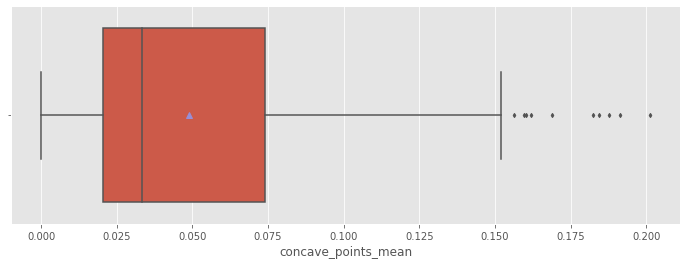

In [16]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'concave_points_mean', data = df2, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()

In [17]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                              7.943911e+06
radius_mean                     4.080000e+00
texture_mean                    5.630000e+00
perimeter_mean                  2.893000e+01
area_mean                       3.624000e+02
smoothness_mean                 1.893000e-02
compactness_mean                6.548000e-02
concavity_mean                  1.011400e-01
concave_points_mean             5.369000e-02
symmetry_mean                   3.380000e-02
fractal_dimension_mean          8.420000e-03
radius_se                       2.465000e-01
texture_se                      6.401000e-01
perimeter_se                    1.751000e+00
area_se                         2.734000e+01
smoothness_se                   2.977000e-03
compactness_se                  1.937000e-02
concavity_se                    2.696000e-02
concave_points_se               7.072000e-03
symmetry_se                     8.320000e-03
fractal_dimension_se            2.310000e-03
radius_worst                    5.780000e+00
texture_wo

In [18]:
IQR*1.5

id                              1.191587e+07
radius_mean                     6.120000e+00
texture_mean                    8.445000e+00
perimeter_mean                  4.339500e+01
area_mean                       5.436000e+02
smoothness_mean                 2.839500e-02
compactness_mean                9.822000e-02
concavity_mean                  1.517100e-01
concave_points_mean             8.053500e-02
symmetry_mean                   5.070000e-02
fractal_dimension_mean          1.263000e-02
radius_se                       3.697500e-01
texture_se                      9.601500e-01
perimeter_se                    2.626500e+00
area_se                         4.101000e+01
smoothness_se                   4.465500e-03
compactness_se                  2.905500e-02
concavity_se                    4.044000e-02
concave_points_se               1.060800e-02
symmetry_se                     1.248000e-02
fractal_dimension_se            3.465000e-03
radius_worst                    8.670000e+00
texture_wo

In [19]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
cons=IQR*1.5
print(cons)

id                              1.191587e+07
radius_mean                     6.120000e+00
texture_mean                    8.445000e+00
perimeter_mean                  4.339500e+01
area_mean                       5.436000e+02
smoothness_mean                 2.839500e-02
compactness_mean                9.822000e-02
concavity_mean                  1.517100e-01
concave_points_mean             8.053500e-02
symmetry_mean                   5.070000e-02
fractal_dimension_mean          1.263000e-02
radius_se                       3.697500e-01
texture_se                      9.601500e-01
perimeter_se                    2.626500e+00
area_se                         4.101000e+01
smoothness_se                   4.465500e-03
compactness_se                  2.905500e-02
concavity_se                    4.044000e-02
concave_points_se               1.060800e-02
symmetry_se                     1.248000e-02
fractal_dimension_se            3.465000e-03
radius_worst                    8.670000e+00
texture_wo

In [20]:
# These values are a mathematical calculation of the outliers in the data, and will then be dropped from the data set. 
upper_outlier = Q3+cons
lower_outlier = Q1-cons
print(upper_outlier)
print('_______________')
print(lower_outlier)

id                              2.072900e+07
radius_mean                     2.190000e+01
texture_mean                    3.024500e+01
perimeter_mean                  1.474950e+02
area_mean                       1.326300e+03
smoothness_mean                 1.336950e-01
compactness_mean                2.286200e-01
concavity_mean                  2.824100e-01
concave_points_mean             1.545350e-01
symmetry_mean                   2.464000e-01
fractal_dimension_mean          7.875000e-02
radius_se                       8.486500e-01
texture_se                      2.434150e+00
perimeter_se                    5.983500e+00
area_se                         8.620000e+01
smoothness_se                   1.261150e-02
compactness_se                  6.150500e-02
concavity_se                    8.249000e-02
concave_points_se               2.531800e-02
symmetry_se                     3.596000e-02
fractal_dimension_se            8.023000e-03
radius_worst                    2.746000e+01
texture_wo

In [21]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# df3 = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [22]:
# df3.hist(figsize=(20,17))

In [23]:
# df3.head()

In [24]:
# df3.info()

In [25]:
clean_df = df2.drop(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se'], axis = 1)

In [26]:
clean_df2 = clean_df.drop(['area_mean', 'area_worst', 'compactness_mean', 'compactness_worst', 'concave_points_mean', 'concave_points_worst', 'concavity_mean', 'concavity_worst', 'fractal_dimension_mean', 'fractal_dimension_worst', 'perimeter_mean', 'perimeter_worst', 'radius_mean', 'radius_worst', 'symmetry_worst'], axis = 1)

In [27]:
clean_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 22 columns):
id                              569 non-null int64
diagnosis                       569 non-null object
texture_mean                    569 non-null float64
smoothness_mean                 569 non-null float64
symmetry_mean                   569 non-null float64
texture_worst                   569 non-null float64
smoothness_worst                569 non-null float64
area_meanCBRT_                  569 non-null float64
area_worstCBRT_                 569 non-null float64
compactness_meanCBRT_           569 non-null float64
compactness_worstCBRT_          569 non-null float64
concave_points_meanCBRT_        569 non-null float64
concave_points_worstCBRT_       569 non-null float64
concavity_meanCBRT_             569 non-null float64
concavity_worstCBRT_            569 non-null float64
fractal_dimension_meanCBRT_     569 non-null float64
fractal_dimension_worstCBRT_    569 non-null float

# Correlations 

Correlations are being conducted in order to explore strong associations among the variables. 

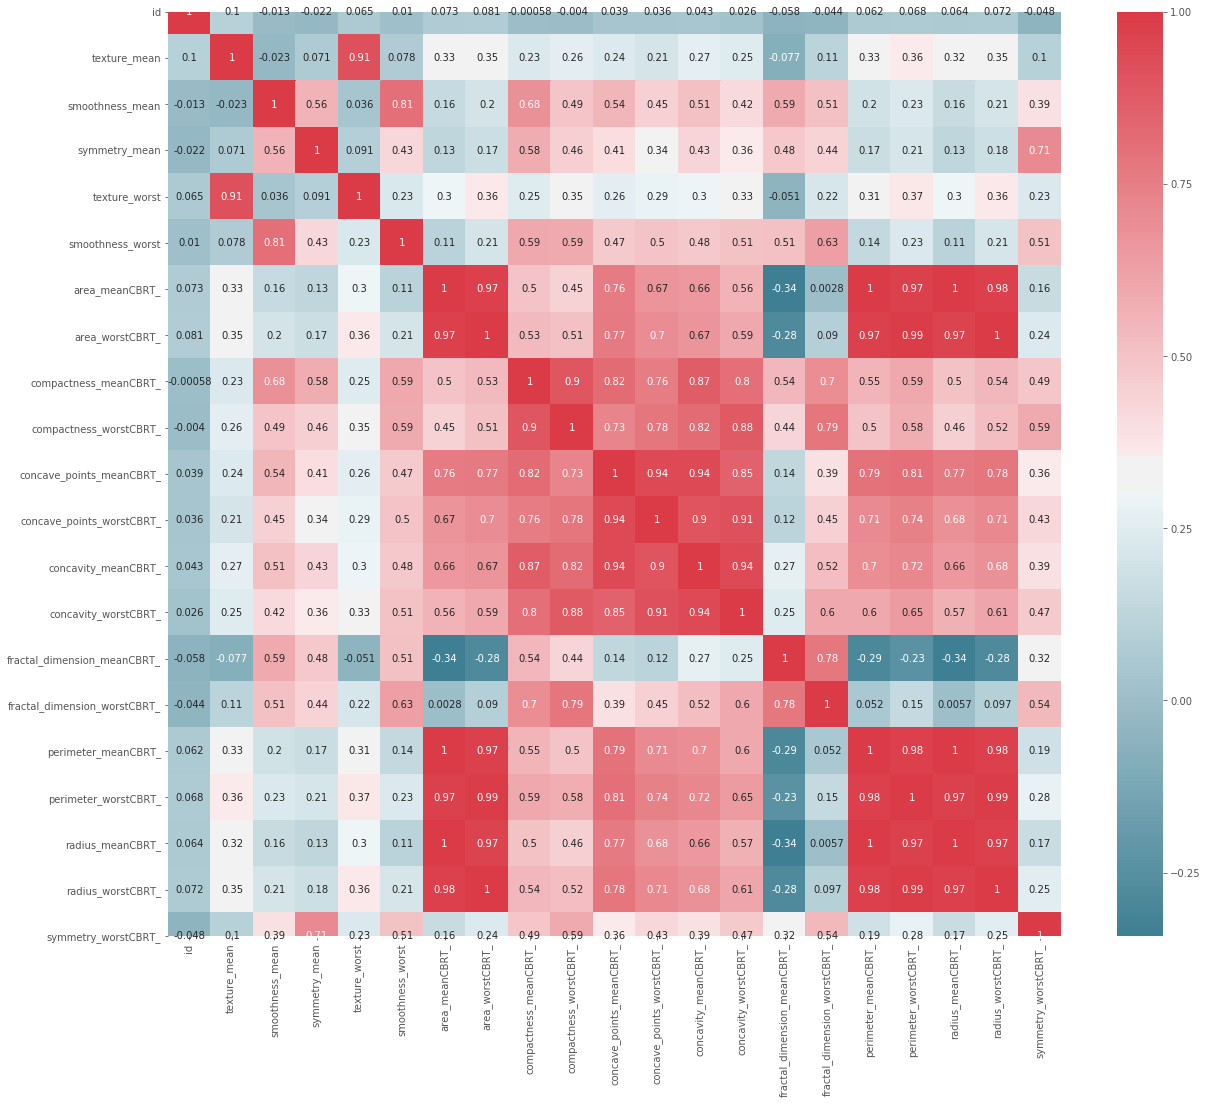

In [28]:
def correlation_heatmap(clean_df2):
    _,ax=plt.subplots(figsize=(20,17))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(clean_df2.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(clean_df2)

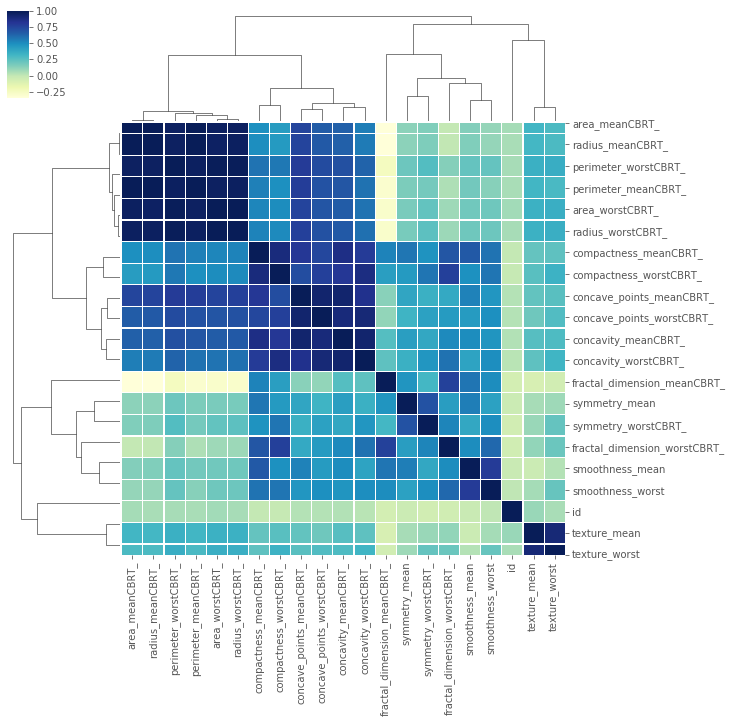

In [29]:
corrmat = clean_df2.corr() 
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg 

In [30]:
print(clean_df2.corr())

                                    id  texture_mean  smoothness_mean  \
id                            1.000000      0.099770        -0.012968   
texture_mean                  0.099770      1.000000        -0.023389   
smoothness_mean              -0.012968     -0.023389         1.000000   
symmetry_mean                -0.022114      0.071401         0.557775   
texture_worst                 0.064720      0.912045         0.036072   
smoothness_worst              0.010338      0.077503         0.805324   
area_meanCBRT_                0.073445      0.325592         0.155372   
area_worstCBRT_               0.080989      0.352119         0.199625   
compactness_meanCBRT_        -0.000580      0.230639         0.681359   
compactness_worstCBRT_       -0.004002      0.262881         0.492410   
concave_points_meanCBRT_      0.039029      0.237696         0.544865   
concave_points_worstCBRT_     0.035845      0.208601         0.454480   
concavity_meanCBRT_           0.042736      0.27010

# Dropping strongly correlated variables in order to avoid confounding effects. 

In [31]:
# Correlation matrix
corr_matrix = clean_df2.corr().abs()

In [32]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [33]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [34]:
to_drop

['texture_worst',
 'area_worstCBRT_',
 'concave_points_worstCBRT_',
 'concavity_meanCBRT_',
 'concavity_worstCBRT_',
 'perimeter_meanCBRT_',
 'perimeter_worstCBRT_',
 'radius_meanCBRT_',
 'radius_worstCBRT_']

In [35]:
# Drop features
main_df = clean_df2.drop(['texture_worst', 'area_worstCBRT_', 'concave_points_worstCBRT_', 'concavity_meanCBRT_', 'concavity_worstCBRT_', 'perimeter_meanCBRT_', 'perimeter_worstCBRT_', 'radius_meanCBRT_',
 'radius_worstCBRT_'], axis = 1)

In [36]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
id                              569 non-null int64
diagnosis                       569 non-null object
texture_mean                    569 non-null float64
smoothness_mean                 569 non-null float64
symmetry_mean                   569 non-null float64
smoothness_worst                569 non-null float64
area_meanCBRT_                  569 non-null float64
compactness_meanCBRT_           569 non-null float64
compactness_worstCBRT_          569 non-null float64
concave_points_meanCBRT_        569 non-null float64
fractal_dimension_meanCBRT_     569 non-null float64
fractal_dimension_worstCBRT_    569 non-null float64
symmetry_worstCBRT_             569 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 57.9+ KB


In [37]:
main_df.shape

(569, 13)

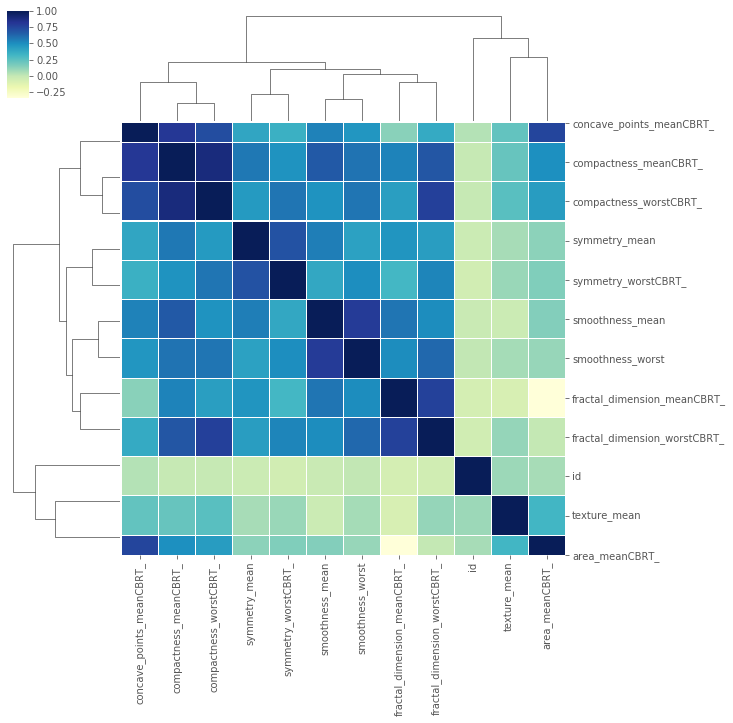

In [38]:
corrmat = main_df.corr() 
  
cg2 = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg2.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg2

# Exploring the Data

In [39]:
# Summary statistics for diagnosis 
main_df['diagnosis'].describe()

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

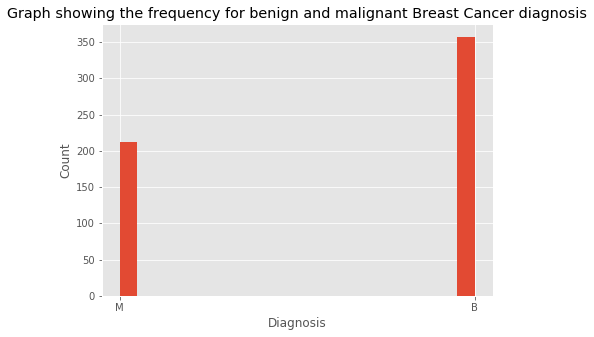

In [40]:
#Plot distribution of diagnosis 
plt.figure(figsize=(7,5))
plt.title('Graph showing the frequency for benign and malignant Breast Cancer diagnosis')
plt.hist(main_df['diagnosis'], bins=20)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [41]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
id                              569 non-null int64
diagnosis                       569 non-null object
texture_mean                    569 non-null float64
smoothness_mean                 569 non-null float64
symmetry_mean                   569 non-null float64
smoothness_worst                569 non-null float64
area_meanCBRT_                  569 non-null float64
compactness_meanCBRT_           569 non-null float64
compactness_worstCBRT_          569 non-null float64
concave_points_meanCBRT_        569 non-null float64
fractal_dimension_meanCBRT_     569 non-null float64
fractal_dimension_worstCBRT_    569 non-null float64
symmetry_worstCBRT_             569 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 57.9+ KB


In [42]:
main_df.shape

(569, 13)

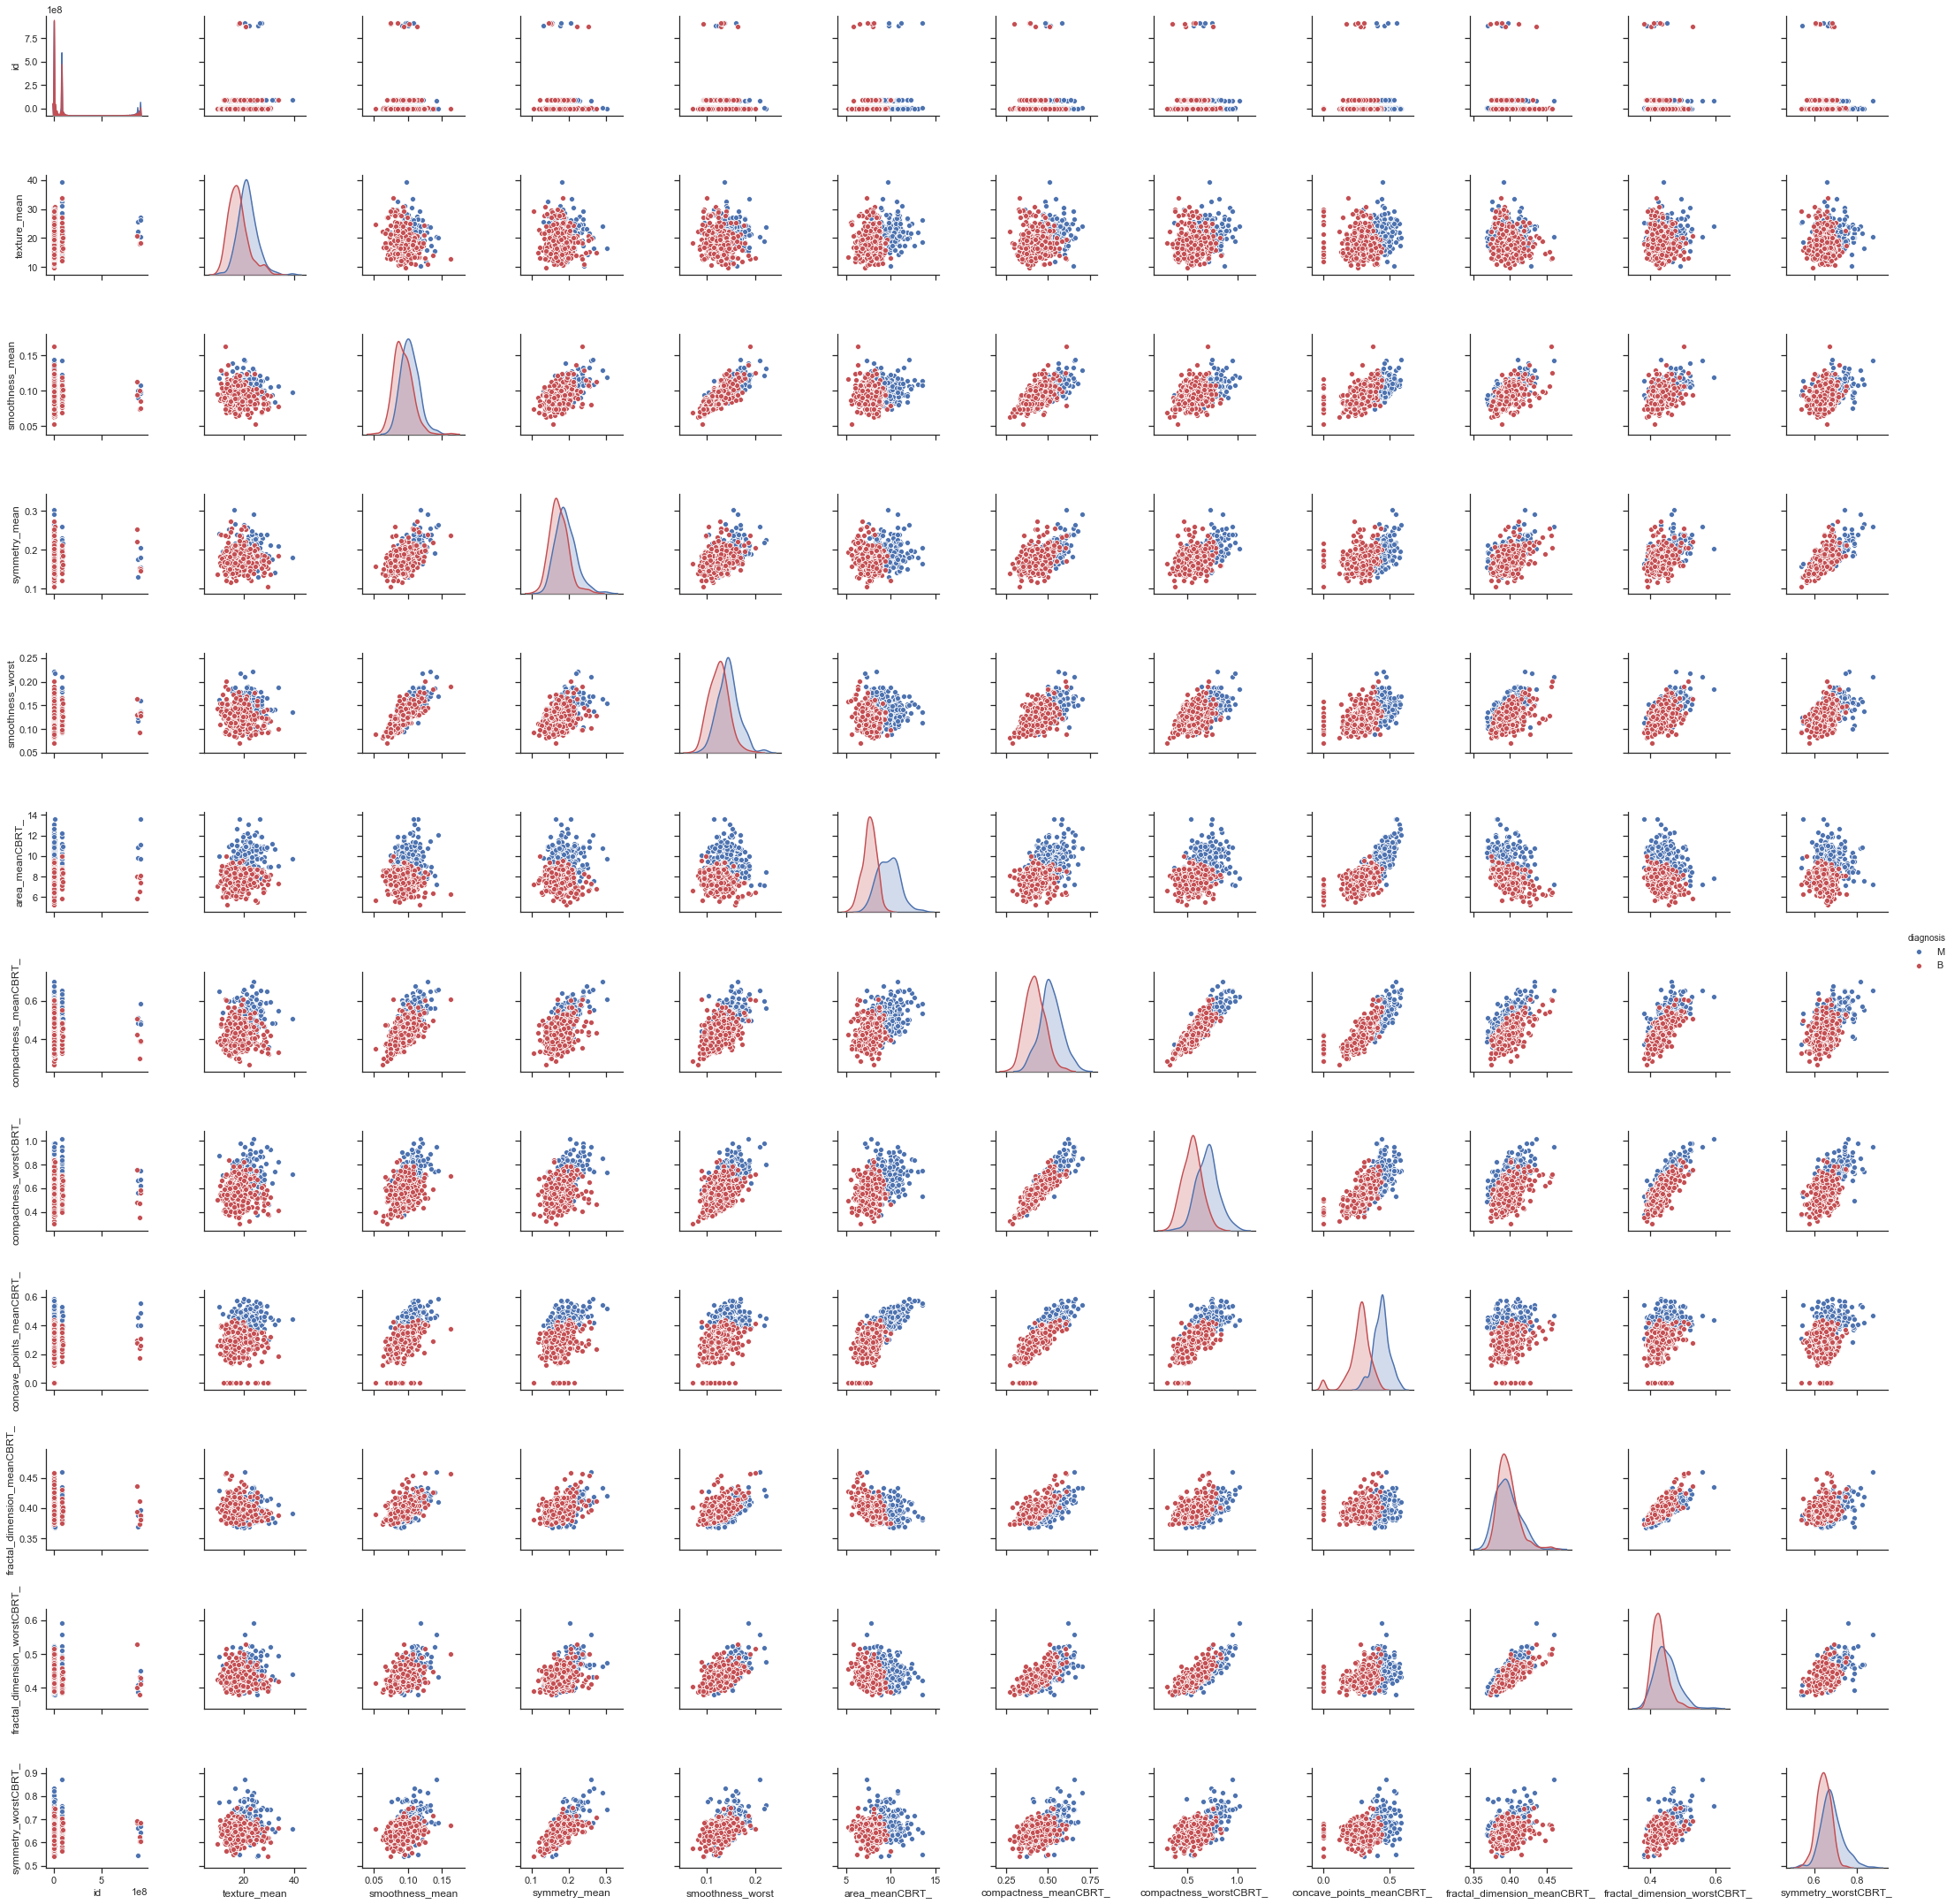

In [43]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(main_df, palette = ('b', 'r'), hue="diagnosis", height=2.5)
plt.show()

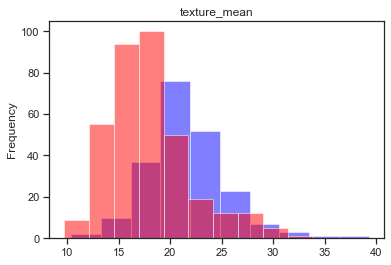

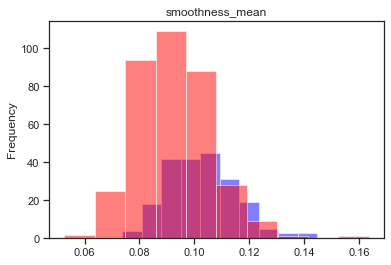

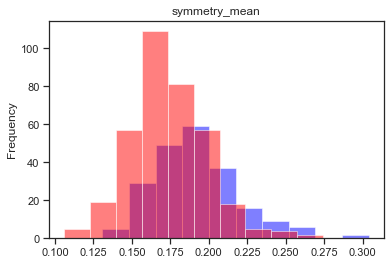

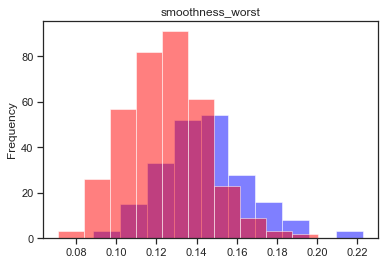

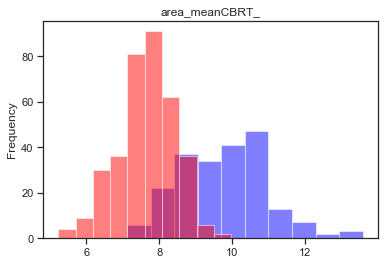

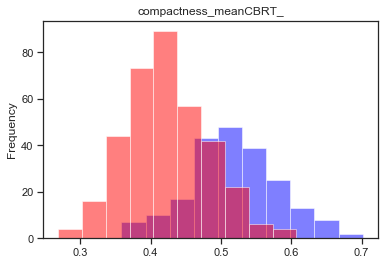

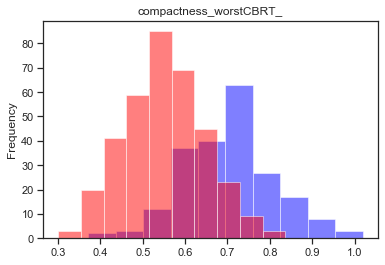

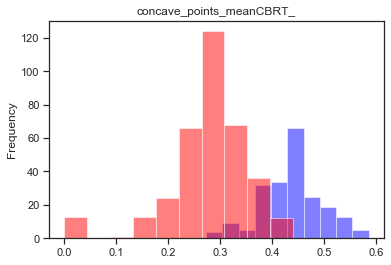

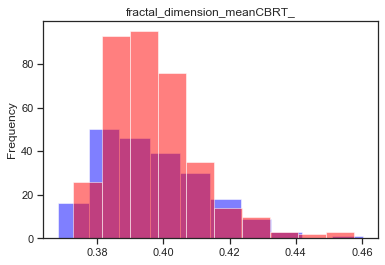

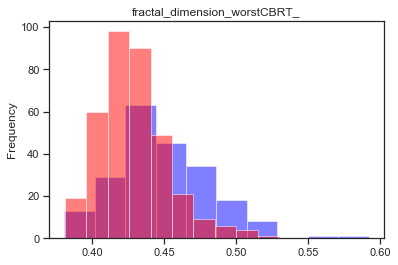

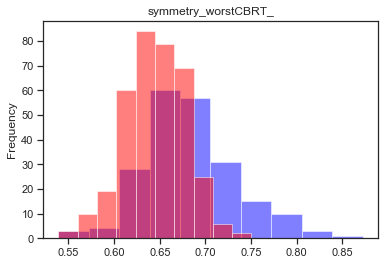

In [44]:
for i in ['texture_mean', 'smoothness_mean', 'symmetry_mean', 'smoothness_worst', 'area_meanCBRT_', 'compactness_meanCBRT_', 'compactness_worstCBRT_', 'concave_points_meanCBRT_', 'fractal_dimension_meanCBRT_', 'fractal_dimension_worstCBRT_', 'symmetry_worstCBRT_']: 
    plt.figure()
    main_df[i]
    main_df[i][main_df['diagnosis'] =='M'].plot.hist(alpha = 0.5, color='blue', title = i)
    main_df[i][main_df['diagnosis'] =='B'].plot.hist(alpha = 0.5, color='red', title = i)
    plt.show()
    

# Welch's T-Tests for Independent Groups (Malignant and Benign) for uneven sample size

# area_meanCBRT_

In [45]:
ben_area_means = main_df.loc[main_df['diagnosis'] == 'B', 'area_meanCBRT_']
mal_area_means = main_df.loc[main_df['diagnosis'] == 'M', 'area_meanCBRT_']

In [46]:
stats.ttest_ind(ben_area_means, mal_area_means, equal_var = False)

Ttest_indResult(statistic=-23.110843802296564, pvalue=8.230229504425566e-70)

# concave_points_meanCBRT_

In [47]:
ben_concave_points_meanCBRT_ = main_df.loc[main_df['diagnosis'] == 'B', 'concave_points_meanCBRT_']
mal_concave_points_meanCBRT_ = main_df.loc[main_df['diagnosis'] == 'M', 'concave_points_meanCBRT_']

In [48]:
stats.ttest_ind(ben_concave_points_meanCBRT_, mal_concave_points_meanCBRT_, equal_var = False)

Ttest_indResult(statistic=-27.60111008394631, pvalue=3.2672669905208683e-105)

# compactness_meanCBRT_

In [49]:
ben_compactness_meanCBRT_ = main_df.loc[main_df['diagnosis'] == 'B', 'compactness_meanCBRT_']
mal_compactness_meanCBRT_ = main_df.loc[main_df['diagnosis'] == 'M', 'compactness_meanCBRT_']

In [50]:
stats.ttest_ind(ben_compactness_meanCBRT_, mal_compactness_meanCBRT_, equal_var = False)

Ttest_indResult(statistic=-17.60543840086473, pvalue=5.6076017879557095e-52)

# compactness_worstCBRT_

In [51]:
ben_compactness_worstCBRT_ = main_df.loc[main_df['diagnosis'] == 'B', 'compactness_worstCBRT_']
mal_compactness_worstCBRT_ = main_df.loc[main_df['diagnosis'] == 'M', 'compactness_worstCBRT_']

In [52]:
stats.ttest_ind(ben_compactness_worstCBRT_, mal_compactness_worstCBRT_, equal_var = False)

Ttest_indResult(statistic=-17.308347489613823, pvalue=1.845424329005637e-50)

# smoothness_mean

In [53]:
ben_smoothness_mean = main_df.loc[main_df['diagnosis'] == 'B', 'smoothness_mean']
mal_smoothness_mean = main_df.loc[main_df['diagnosis'] == 'M', 'smoothness_mean']

In [54]:
stats.ttest_ind(ben_smoothness_mean, mal_smoothness_mean, equal_var = False)

Ttest_indResult(statistic=-9.297355109660026, pvalue=5.573331322107757e-19)

# texture_mean

In [55]:
ben_texture_mean  = main_df.loc[main_df['diagnosis'] == 'B', 'texture_mean']
mal_texture_mean  = main_df.loc[main_df['diagnosis'] == 'M', 'texture_mean']

In [56]:
stats.ttest_ind(ben_texture_mean, mal_texture_mean, equal_var = False)

Ttest_indResult(statistic=-11.022086546579432, pvalue=3.019055292193917e-25)

# Looops for the remaining T-Tests

In [57]:
for i in ['symmetry_mean','smoothness_worst', 'fractal_dimension_meanCBRT_', 'fractal_dimension_worstCBRT_', 'symmetry_worstCBRT_']:
    t_results = []
    i1=main_df.loc[main_df['diagnosis'] == 'B', i]
    i2=main_df.loc[main_df['diagnosis'] == 'M', i]
    t_results.append(f'{i}--------{stats.ttest_ind(i1,i2, equal_var = False)}')
    print(t_results)

['symmetry_mean--------Ttest_indResult(statistic=-8.112197650883767, pvalue=5.957650760938452e-15)']
['smoothness_worst--------Ttest_indResult(statistic=-10.819553043932244, pvalue=3.4743759425754134e-24)']
['fractal_dimension_meanCBRT_--------Ttest_indResult(statistic=0.41846312326450774, pvalue=0.6758352129572149)']
['fractal_dimension_worstCBRT_--------Ttest_indResult(statistic=-7.479552650569981, pvalue=6.553106921661644e-13)']
['symmetry_worstCBRT_--------Ttest_indResult(statistic=-9.694498908412502, pvalue=1.1574500744024544e-19)']


# T-Tests showed that all selected variables were significanty deffierent when comparing the 2 experimental groups, except one: Fractal_dimension_meanCBRT. 

In [58]:
main_df

,id,diagnosis,texture_mean,smoothness_mean,symmetry_mean,smoothness_worst,area_meanCBRT_,compactness_meanCBRT_,compactness_worstCBRT_,concave_points_meanCBRT_,fractal_dimension_meanCBRT_,fractal_dimension_worstCBRT_,symmetry_worstCBRT_
0,842302,M,10.38,0.11840,0.2419,0.16220,10.003332,0.652339,0.873114,0.527883,0.428558,0.491731,0.772000
1,842517,M,17.77,0.08474,0.1812,0.12380,10.986209,0.428431,0.571440,0.412462,0.384106,0.446508,0.650296
2,84300903,M,21.25,0.10960,0.2069,0.14440,10.635434,0.542770,0.751552,0.503837,0.391465,0.444087,0.712234
3,84348301,M,20.38,0.14250,0.2597,0.20980,7.281708,0.657237,0.953285,0.472069,0.460164,0.557205,0.872327
4,84358402,M,14.34,0.10030,0.1809,0.13740,10.905527,0.510191,0.589637,0.470719,0.388925,0.425027,0.618324
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,22.39,0.11100,0.1726,0.14100,11.393471,0.487560,0.595616,0.517886,0.383109,0.414373,0.590594
565,926682,M,28.25,0.09780,0.1752,0.11660,10.803680,0.469361,0.577100,0.460902,0.381054,0.404878,0.635951
566,926954,M,28.08,0.08455,0.1590,0.11390,9.502677,0.467690,0.676353,0.375676,0.383676,0.427631,0.605323
567,927241,M,29.33,0.11780,0.2397,0.16500,10.815091,0.651868,0.953945,0.533680,0.412442,0.498663,0.742110


# Drop Fractal_dimension_meanCBRT

In [59]:
# We are deleting this variable as it is not significant different between the 2 independent groups, 
# hence not useful for the multiple regression model. 
regression_df = main_df

In [60]:
prediction_df = regression_df.drop('fractal_dimension_meanCBRT_', axis = 1)

In [61]:
prediction_df

,id,diagnosis,texture_mean,smoothness_mean,symmetry_mean,smoothness_worst,area_meanCBRT_,compactness_meanCBRT_,compactness_worstCBRT_,concave_points_meanCBRT_,fractal_dimension_worstCBRT_,symmetry_worstCBRT_
0,842302,M,10.38,0.11840,0.2419,0.16220,10.003332,0.652339,0.873114,0.527883,0.491731,0.772000
1,842517,M,17.77,0.08474,0.1812,0.12380,10.986209,0.428431,0.571440,0.412462,0.446508,0.650296
2,84300903,M,21.25,0.10960,0.2069,0.14440,10.635434,0.542770,0.751552,0.503837,0.444087,0.712234
3,84348301,M,20.38,0.14250,0.2597,0.20980,7.281708,0.657237,0.953285,0.472069,0.557205,0.872327
4,84358402,M,14.34,0.10030,0.1809,0.13740,10.905527,0.510191,0.589637,0.470719,0.425027,0.618324
...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,22.39,0.11100,0.1726,0.14100,11.393471,0.487560,0.595616,0.517886,0.414373,0.590594
565,926682,M,28.25,0.09780,0.1752,0.11660,10.803680,0.469361,0.577100,0.460902,0.404878,0.635951
566,926954,M,28.08,0.08455,0.1590,0.11390,9.502677,0.467690,0.676353,0.375676,0.427631,0.605323
567,927241,M,29.33,0.11780,0.2397,0.16500,10.815091,0.651868,0.953945,0.533680,0.498663,0.742110


# Multiple Regression Model 

In [62]:
# Transforming categorical dat into binary code
sample_df = pd.DataFrame()
sample_df = prediction_df
sample_df['diagnosis'] = prediction_df['diagnosis'].map({'M': 1, 'B': 0})

In [63]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
id                              569 non-null int64
diagnosis                       569 non-null int64
texture_mean                    569 non-null float64
smoothness_mean                 569 non-null float64
symmetry_mean                   569 non-null float64
smoothness_worst                569 non-null float64
area_meanCBRT_                  569 non-null float64
compactness_meanCBRT_           569 non-null float64
compactness_worstCBRT_          569 non-null float64
concave_points_meanCBRT_        569 non-null float64
fractal_dimension_worstCBRT_    569 non-null float64
symmetry_worstCBRT_             569 non-null float64
dtypes: float64(10), int64(2)
memory usage: 53.5 KB


In [64]:
df_model_data = sample_df[['diagnosis', 'texture_mean', 'smoothness_mean', 'symmetry_mean', 'smoothness_worst', 'area_meanCBRT_', 'compactness_meanCBRT_', 'compactness_worstCBRT_', 'concave_points_meanCBRT_', 'fractal_dimension_worstCBRT_', 'symmetry_worstCBRT_']] 

In [65]:
df_model_data

,diagnosis,texture_mean,smoothness_mean,symmetry_mean,smoothness_worst,area_meanCBRT_,compactness_meanCBRT_,compactness_worstCBRT_,concave_points_meanCBRT_,fractal_dimension_worstCBRT_,symmetry_worstCBRT_
0,1,10.38,0.11840,0.2419,0.16220,10.003332,0.652339,0.873114,0.527883,0.491731,0.772000
1,1,17.77,0.08474,0.1812,0.12380,10.986209,0.428431,0.571440,0.412462,0.446508,0.650296
2,1,21.25,0.10960,0.2069,0.14440,10.635434,0.542770,0.751552,0.503837,0.444087,0.712234
3,1,20.38,0.14250,0.2597,0.20980,7.281708,0.657237,0.953285,0.472069,0.557205,0.872327
4,1,14.34,0.10030,0.1809,0.13740,10.905527,0.510191,0.589637,0.470719,0.425027,0.618324
...,...,...,...,...,...,...,...,...,...,...,...
564,1,22.39,0.11100,0.1726,0.14100,11.393471,0.487560,0.595616,0.517886,0.414373,0.590594
565,1,28.25,0.09780,0.1752,0.11660,10.803680,0.469361,0.577100,0.460902,0.404878,0.635951
566,1,28.08,0.08455,0.1590,0.11390,9.502677,0.467690,0.676353,0.375676,0.427631,0.605323
567,1,29.33,0.11780,0.2397,0.16500,10.815091,0.651868,0.953945,0.533680,0.498663,0.742110


In [68]:
outcome = 'diagnosis'
predictors = df_model_data.drop('diagnosis', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula= formula, data= df_model_data).fit()

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diagnosis   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     141.7
Date:                Thu, 02 Jan 2020   Prob (F-statistic):          4.81e-146
Time:                        16:38:52   Log-Likelihood:                -34.254
No. Observations:                 569   AIC:                             90.51
Df Residuals:                     558   BIC:                             138.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -4.0944      0.362    -11.296      0.000      -4.806      -3.382
texture_mean                     0.0195      0.003      6.985      0.000       0.014       0.025
smoothness_mean                 -1.9390      2.028     -0.956      0.340      -5.923       2.045
symmetry_mean                    0.4833      0.753      0.642      0.521      -0.996       1.962
smoothness_worst                 4.6579      1.066      4.371      0.000       2.565       6.751
area_meanCBRT_                   0.1953      0.016     12.533      0.000       0.165       0.226
compactness_meanCBRT_           -0.6416      0.603     -1.063      0.288      -1.827       0.544
compactness_worstCBRT_          -0.2944      0.343     -0.858      0.391      -0.968       0.379
concave_points_meanCBRT_         0.9387      0.271      3.461      0.001       0.406       1.471
fractal_dimension_worstCBRT_     2.6669      0.818      3.261      0.001       1.060       4.273
symmetry_worstCBRT_              1.3917      0.463      3.004      0.003       0.482       2.302
==============================================================================
Omnibus:                       23.236   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.338
Skew:                           0.517   Prob(JB):                     3.15e-06
Kurtosis:                       3.007   Cond. No.                     4.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""